Connected to MLP_projekt (Python 3.13.9)

<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<ipython-input-1-4650740bed46>:13: SyntaxWarning: invalid escape sequence '\o'
  - files on folder: '\old_ML_procect_files\'
c:\Users\tgmin\anaconda3\envs\MLP_projekt\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


----------------------------------------
Data raw
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 

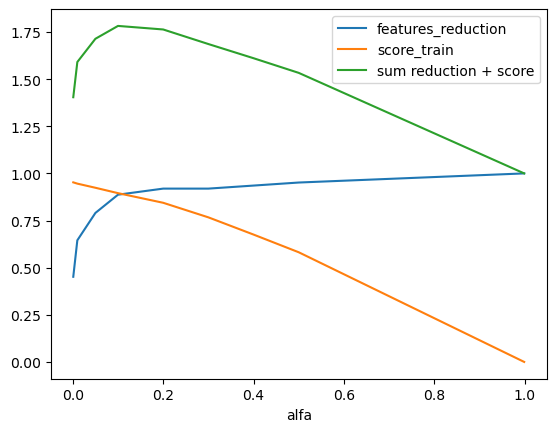

------------------------------------
lasso features counts:
alfa =0.001    34
alfa =0.01     22
alfa =0.05     13
alfa =0.1       7
alfa =0.2       5
alfa =0.3       5
alfa =0.4       4
alfa =0.5       3
alfa =0.999     0
dtype: int64
------------------------------------
Lasso best_featurtes: ['weight', 'model year', 'clust_1', 'clust_6', 'cylinders_weight_x+y', 'displacement_model year_x+y', 'weight_model year_x+y']
------------------------------------


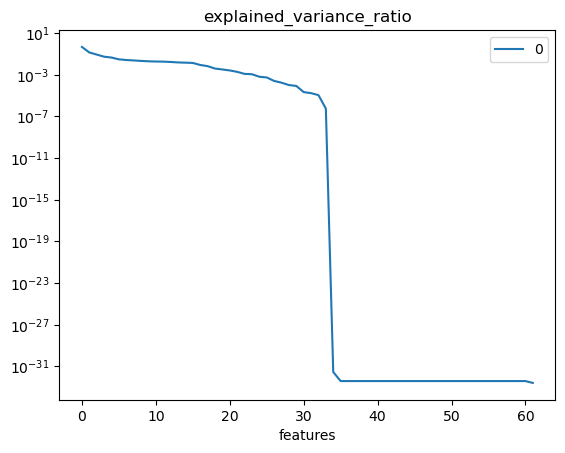

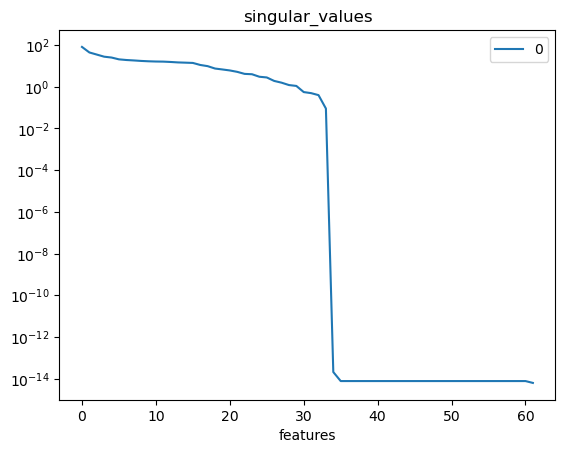

   features_count features_non_zero score_train  features_reduction  \
1              62                 1    0.696577            0.016129   
3              62                 3    0.848247            0.048387   
5              62                 5    0.851402            0.080645   
10             62                10      0.8645            0.161290   
20             62                20    0.945169            0.322581   
30             62                30    0.953693            0.483871   
40             62                40    0.960097            0.645161   
50             62                50    0.961939            0.806452   

    1/features_count + score  
1                   1.696577  
3                   1.181580  
5                   1.051402  
10                  0.964500  
20                  0.995169  
30                  0.987026  
40                  0.985097  
50                  0.981939  
20


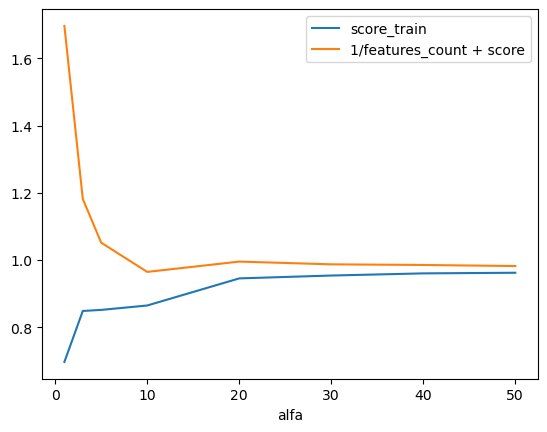

Accuracy: 0.9490170933093215
Best hyperparameters: {'alpha': 0.002467104304681193}
-----------------------------------
Optimised Lasso alfa: {'alpha': 0.002467104304681193}
Optimised features: 28
optuna_lasso_best_featurtes: ['cylinders', 'horsepower', 'acceleration', 'model year', 'clust_1', 'clust_2', 'clust_3', 'clust_4', 'clust_5', 'clust_6', 'clust_7', 'origin_2', 'origin_3', 'cylinders_displacement_x+y', 'cylinders_displacement_x*y', 'cylinders_horsepower_x-y', 'cylinders_weight_x-y', 'cylinders_acceleration_x-y', 'cylinders_model year_x+y', 'displacement_horsepower_x-y', 'displacement_acceleration_x-y', 'displacement_model year_x-y', 'displacement_model year_x*y', 'horsepower_acceleration_x-y', 'horsepower_model year_x*y', 'weight_model year_x-y', 'weight_model year_x*y', 'acceleration_model year_x+y']
------------------------------------
                                   model_name  \
0                                  base_model   
1                          Outliers selectio

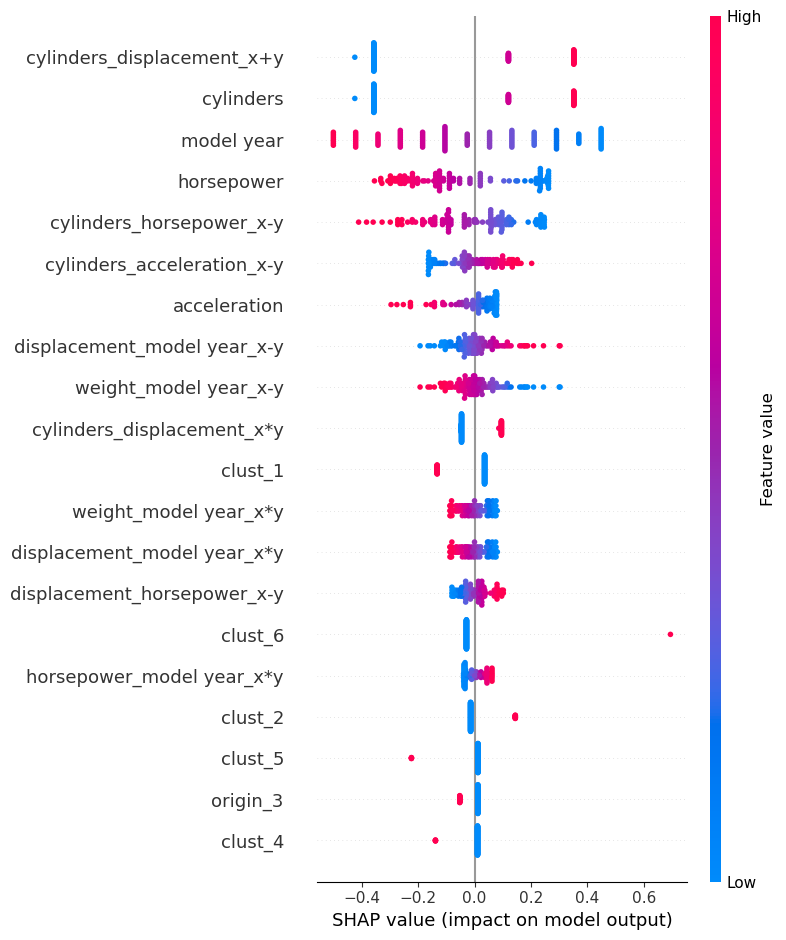

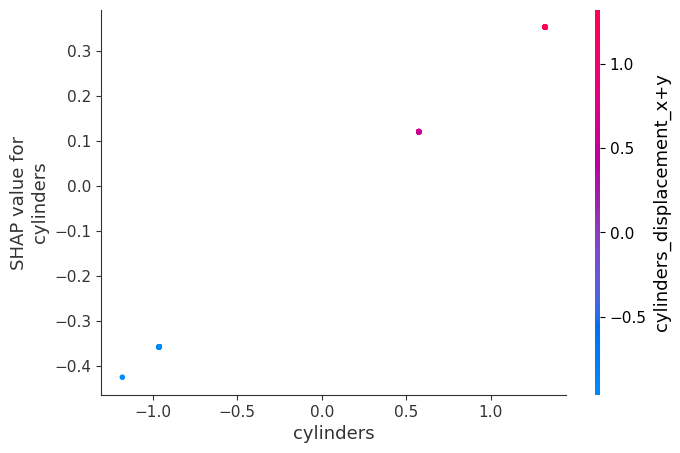

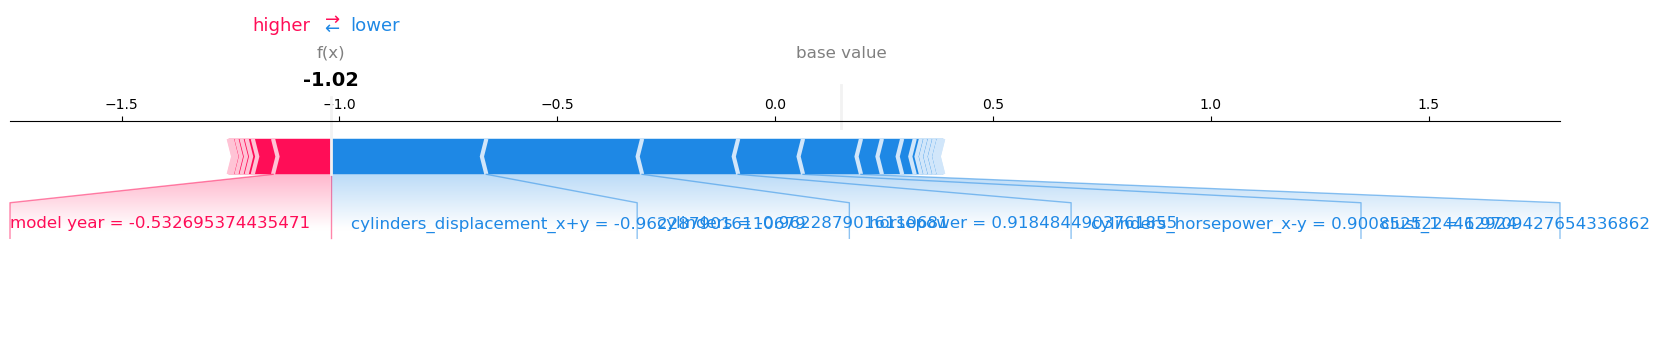

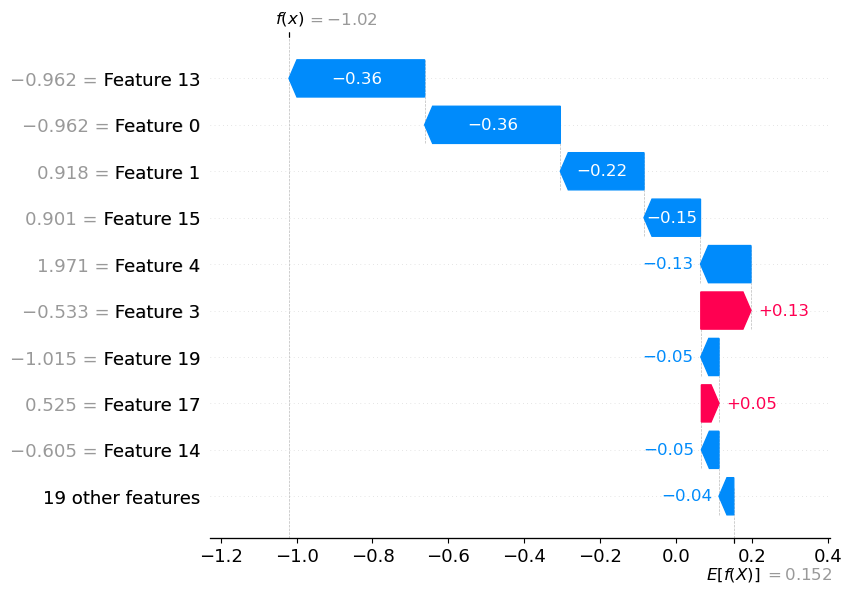

------------------------------------
                   model_name               model score_train score_test  \
0                  base_model  LinearRegression()    0.882957   0.824593   
1          Outliers selection  LinearRegression()    0.882957   0.824593   
7                      transf  LinearRegression()    0.913149   0.882767   
8          Outliers selection  LinearRegression()    0.913149   0.882767   
9          transf_no_outliers  LinearRegression()    0.934481   0.945345   
10               features_all  LinearRegression()    0.947231   0.948348   
11        features_all_transf  LinearRegression()    0.957423   0.935595   
12          Lasso alpha=0.001  Lasso(alpha=0.001)    0.952524   0.947762   
13           Lasso alpha=0.01   Lasso(alpha=0.01)    0.945766   0.946011   
14           Lasso alpha=0.05   Lasso(alpha=0.05)     0.92385    0.93236   
15            Lasso alpha=0.1    Lasso(alpha=0.1)    0.895262   0.911779   
16            Lasso alpha=0.2    Lasso(alpha=0.2)  

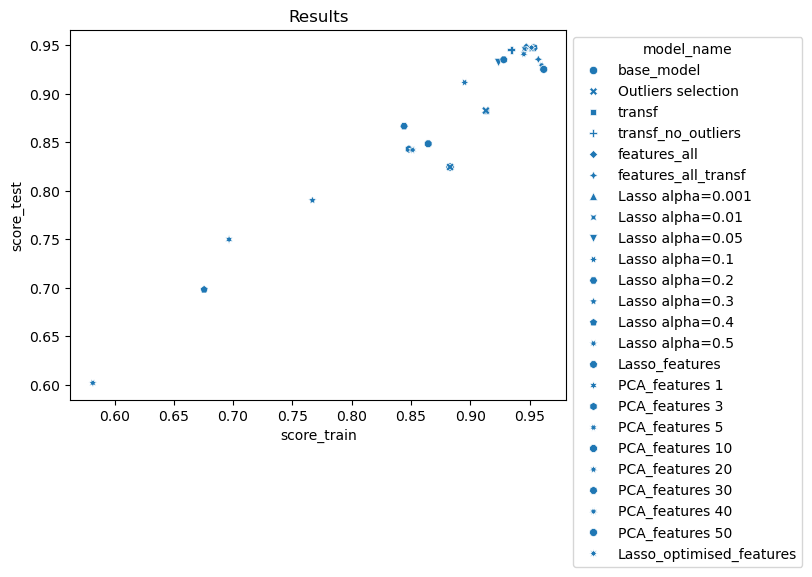

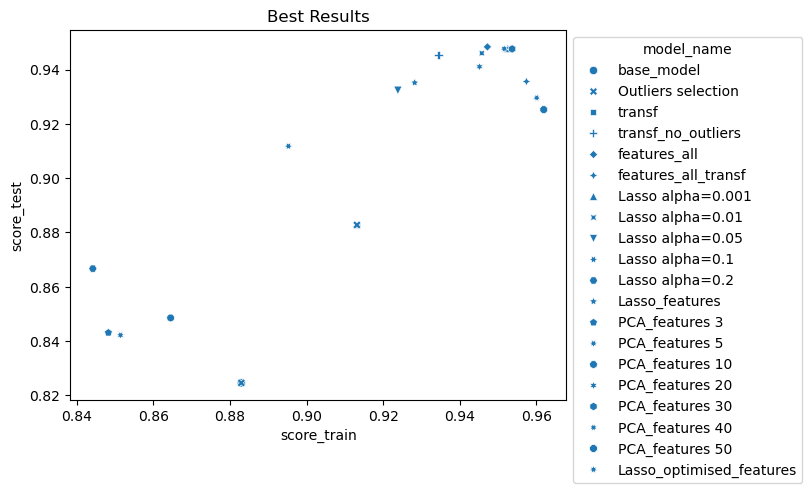

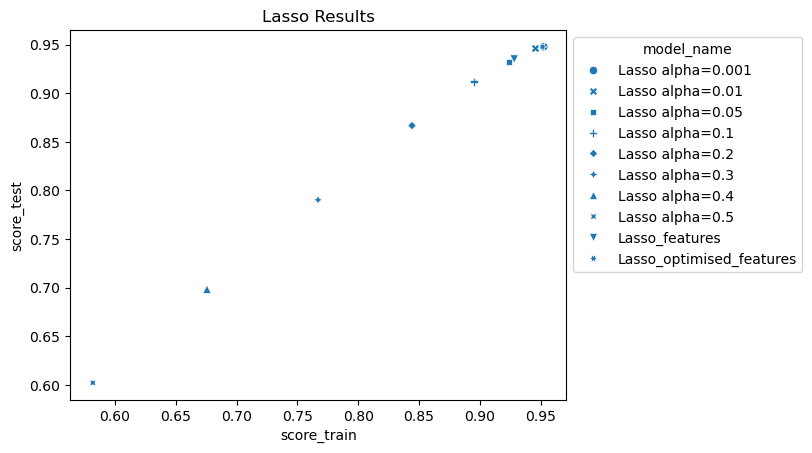

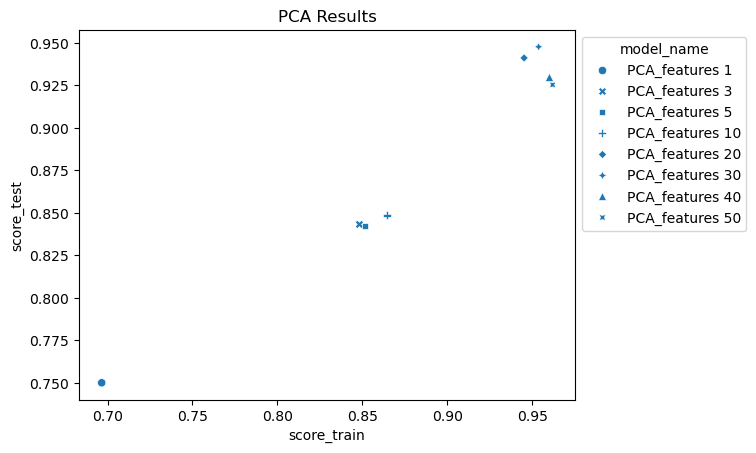

In [ ]:
''' MLP project

main file

Paweł Józefczyk
Tomasz Gmiński

data file: 'cars.csv'
target_column: 'mpg' - miles per galon

As preliminary Project ML was used.
    - github repository: https://github.com/tgminski/Projekt_ML_final
    - files on folder: '\old_ML_procect_files\'

'''


# import libraries
import utilites_TG
import utilites_PJ
#from TG_ML_clustering_utilities import TG_data_normalize_stats, TG_clustering_ml
from TG_ML_clustering_utilities import TG_ML_with_context

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

import shap

import warnings
warnings.filterwarnings("ignore")

def main():
    #pd.options.mode.chained_assignment = None  # default='warn'
    target = 'mpg'
    column_to_dummy_variable = 'origin'

#------------------------------------------------------------
# 1. Read raw data
#------------------------------------------------------------
    # 1.1 Import from network (Keaggle)

    #utilites_TG.import_cars_dataset_keaggle()

    # 1.2 Import from local file
    #DATA_RAW = utilites_TG.load_data_from_csv('_src_data/cars.csv')   # pd.DataFrame
    DATA_RAW = utilites_TG.load_data_from_csv('_src_data/auto-mpg.csv')   # pd.DataFrame
    #DATA_RAW = DATA_RAW.drop(labels=['name'], axis=1)

    # data setup
    DATA_RAW = DATA_RAW.drop(labels=['car name'], axis=1)
    DATA_RAW['horsepower'] = DATA_RAW['horsepower'].str.replace('?', 'nan')
    DATA_RAW['horsepower'] = pd.to_numeric(DATA_RAW['horsepower'], errors='coerce')
    print('----------------------------------------')
    print('Data raw')
    print(DATA_RAW.head())
    print(DATA_RAW.info())

#------------------------------------------------------------
# 2. Check data 
#------------------------------------------------------------
    # 2.1 Data description and data check
        # 
        # https://github.com/tgminski/Projekt_ML_final/02_Projekt_ML_Data_preprocessing_part_1.ipynb

#------------------------------------------------------------
# 3. Explore data
#------------------------------------------------------------
    # 3.1 NaN checking
    data_no_nan = DATA_RAW.dropna().copy()   # formal, data not have nan
    # 3.2 Data distributions, transformations for normality
        #https://github.com/tgminski/Projekt_ML_final/02_Projekt_ML_Data_preprocessing_part_1.ipynb

    # 3.3 Categorical data: column 'origin'

# tu się coś wyrabia
    
    score_target =  0.99
    ML_with_context = TG_ML_with_context(scaler=StandardScaler,
                    ml_clustering_method=LinearRegression,
                    score_clustering_stop=score_target, n_cluster_max=50,
                    ml_membership_method=RandomForestClassifier,
                    verbose=0)
    ML_with_context.fit(data=data_no_nan, target=target, verbose=2)

    df_clustering = ML_with_context._fit_data.df_clustering.iloc[:,0:-1]
    #df_clustering = ML_with_context._fit_data.df_clustering_with_adds_mean.iloc[:,0:-1]
    df_clustering_ = pd.DataFrame()
    for col in df_clustering.columns:
        col_name = 'clust_' + col
        df_clustering_[col_name] = df_clustering[col]

    data_no_nan = pd.concat([data_no_nan,df_clustering_], axis=1).copy()

    print('----------------------------------------')
    print('data_no_nan')
    print(data_no_nan.head())
    print(data_no_nan.info())

    #assert 0, 'Manual Break'


    df_origin_dummy = pd.get_dummies(data_no_nan[column_to_dummy_variable], prefix=column_to_dummy_variable)
    data_no_nan = pd.concat([data_no_nan, df_origin_dummy], axis=1)
    data_no_nan = data_no_nan.drop(columns=[column_to_dummy_variable]).copy()  
    print('----------------------------------------')
    print('Data with dummy variables')
    print(data_no_nan.info())

    # 3.4 Outlaiers selection (outlaiers in one variable context - statistic )
        # outliers from features statistics  +- 1.5*IQR
        # https://github.com/tgminski/Projekt_ML_final/02_Projekt_ML_Data_preprocessing_part_1.ipynb
        # https://github.com/tgminski/Projekt_ML_final/02_Projekt_ML_Data_preprocessing_part_2.ipynb
        
        # outliers in ML context (on part 4 and 6) 

#------------------------------------------------------------
# 4. ML modeling
#------------------------------------------------------------
    # train and test data
    X = data_no_nan.drop([target], axis=1).copy()
    y = data_no_nan[[target]].copy()
    df_train_test = train_test_split(X, y, test_size=0.33, random_state=0)

    # common scaler and model
    scaler_4_ML = StandardScaler
    model_4_ML = LinearRegression
    model_4_ML_args = {} # {'n_jobs':-1}
    
    # 4.1 Base model

    # utilites_TG.models: class for proper training models, to same way of training
    models = utilites_TG.models(df_train_test=df_train_test, data_index=data_no_nan.index)
    
    # base model - Linear regression with raw data
    models.fit_and_score_new_model(data=data_no_nan.copy(deep=True), target=target ,model_name='base_model', scaler=scaler_4_ML, model=model_4_ML, model_arg=model_4_ML_args)

    # outliers checking, no drop data
    num_outliers = models.outliers_selection(data=data_no_nan, target=target, drop_outliers=False)
    print('------------------------------------')
    print('On base model detected', num_outliers, 'outliers.') 


    # 4.2 base data trassformations   
    best_transformations, transformations_list = models.try_data_transformations_e(data=data_no_nan, target=target)
    print('------------------------------------')
    print('Base data trassformations')
    for key in best_transformations:
        print(key, best_transformations[key])
    print('------------------------------------')
    for temp in transformations_list:
        print(temp)
    
    # transform data and scoring model
    for i, transformation in enumerate(transformations_list):
        print('Testing transformation',i)
        data_transformed = models.data_transformation_e(data=data_no_nan, transformation=transformation)
        models.fit_and_score_new_model(data=data_transformed, target=target ,model_name='transformation_'+str(i), scaler=scaler_4_ML, model=model_4_ML, model_arg=model_4_ML_args, y_transf=transformation[target])
    print('------------------------------------')
    print('Transformation 4 was chosed by scoring values')
    print('------------------------------------')
    best_transformation =  transformations_list[4] 
    data_transformed = models.data_transformation_e(data=data_no_nan, transformation=best_transformation)

    # fitting model for transformed data
    models.fit_and_score_new_model(data=data_transformed, target=target ,model_name='transf', scaler=scaler_4_ML, model=model_4_ML, model_arg=model_4_ML_args, y_transf=transformation[target])

    # outliers selection ( 1.5*IQR on residuals), drop outliers from data
    num_outliers = models.outliers_selection(data=data_transformed, target=target, drop_outliers=True)
    print('------------------------------------')
    print('Detected', num_outliers, 'outliers:') 
    print(models.X_train_outliers)

    # fitting model for transformed data without outliers
    models.fit_and_score_new_model(data=data_transformed, target=target ,model_name='transf_no_outliers', scaler=scaler_4_ML, model=model_4_ML, model_arg=model_4_ML_args, y_transf=transformation[target])

    print('------------------------------------')
    print(models.results)

    #assert 0 , 'Manual break'

    # 4.3 Features checking
    df_features = models.new_features(data=data_transformed, target=target)
    print('------------------------------------')
    print('New features:')
    print(df_features.info())  
    # fitting model for transformed data without outliers with new features
    models.fit_and_score_new_model(data=df_features, target=target ,model_name='features_all', scaler=scaler_4_ML, model=model_4_ML, model_arg=model_4_ML_args, y_transf=transformation[target])
    
    # transformations for features
    best_transformations1, transformations_list1 = models.try_data_transformations_e(data=df_features, target=target) 
    print('------------------------------------')
    print('Transformations for features')
    print(transformations_list1[0])
    best_transformation1 =  transformations_list1[0] 
    df_features_transformed = models.data_transformation_e(data=df_features, transformation=best_transformation1)

    # fitting model for transformed data with features (without outliers)
    models.fit_and_score_new_model(data=df_features_transformed, target=target ,model_name='features_all_transf', scaler=scaler_4_ML, model=model_4_ML, model_arg=model_4_ML_args, y_transf=transformation[target])

    # 4.4 Features selection

    # Lasso
    lasso_result, lasso_best_featurtes = models.features_choose_lasso(data=df_features_transformed, target=target)
    print('------------------------------------')
    print('Lasso best_featurtes:',lasso_best_featurtes)
    print('------------------------------------')
    lasso_best_featurtes.append( target )   # uzupełnienie kolumny o target
    df_lasso_features = df_features_transformed[lasso_best_featurtes].copy()
    models.fit_and_score_new_model(data=df_lasso_features, target=target ,model_name='Lasso_features', scaler=scaler_4_ML, model=model_4_ML, model_arg=model_4_ML_args, y_transf=transformation[target])
    
    # save dataset for optuna
    df_features_transformed.to_csv('TG_internal_data/data_all_features.csv', index=True)

    # PCA
    df_data_pca, result_choice, best_n_components = models.features_choose_PCA(data=df_features_transformed, target=target)

    # save results to file    
    utilites_TG.save_df_data_to_csv(models.results, 'TG_internal_data/models_results.csv')
#------------------------------------------------------------
# 5. ML process optimisation
#------------------------------------------------------------

    # Optuna  , choose features, maximizes score on test data
    best_lasso_alfa, optuna_lasso_best_featurtes = models.optimize_lasso_alfa_on_test_score()
    print('-----------------------------------')
    print('Optimised Lasso alfa:',best_lasso_alfa)
    print('Optimised features:', len(optuna_lasso_best_featurtes))
    print('optuna_lasso_best_featurtes:', optuna_lasso_best_featurtes)

    optuna_lasso_best_featurtes.append( target )   
    df_lasso_features = df_features_transformed[optuna_lasso_best_featurtes].copy()
    models.fit_and_score_new_model(data=df_lasso_features, target=target ,model_name='Lasso_optimised_features', scaler=scaler_4_ML, model=model_4_ML, model_arg=model_4_ML_args, y_transf=transformation[target])

    print('------------------------------------')
    print(models.results)

#------------------------------------------------------------
# 6. Shap
#------------------------------------------------------------

    model = models.results['model'].iloc[-1]
    X_train = models.fit_last_X_train_scaled
    X_test = models.fit_last_X_test_scaled
    feature_names = models.fit_last_feature_names
    print('------------------------------------')
    print('feature names for shap:',feature_names)

    # dalej skopiowane z przykładu na zajęciach

    # 3. Explain the model's predictions using SHAP
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)

    # 4. SHAP Summary Plot (global feature importance)
    plt.figure()  # Create a new figure
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)
    plt.show()  # Display the plot

    # 5. SHAP Dependence Plot (feature vs. SHAP value)
    #shap.dependence_plot('horsepower', shap_values.values, X_test, feature_names=feature_names)
    shap.dependence_plot(feature_names[0], shap_values.values, X_test, feature_names=feature_names)
    plt.show()  # Display the plot

    # 6. SHAP Force Plot (local explanation of a single prediction)
    # Create a new figure
    shap.force_plot(explainer.expected_value, shap_values[0].values, X_test[0], feature_names=feature_names, matplotlib=True)
    plt.show()  # Display the plot

    # 7. SHAP Waterfall Plot (breakdown of individual prediction)
    plt.figure()  # Create a new figure
    shap.plots.waterfall(shap_values[0])
    plt.show()  # Display the plot


#------------------------------------------------------------
# 7. Special functions
#------------------------------------------------------------
    # 7.1 ML using in ML function context
        # 6.1.1 Data clustering (in ML context)
        # 6.1.2 Outliers selection (in ML context)
        # 6.1.3 ML modeling (in ML context)

    # Describe in other python file :)

#------------------------------------------------------------
# 8. Results 
#------------------------------------------------------------

    results_final = models.results.copy()
    results_final = results_final[~results_final['model_name'].str.contains('OPTUNA', regex=False)]
    results_final = results_final[~results_final['model_name'].str.contains('transformation', regex=False)]
    results_final = results_final[~results_final['model_name'].str.contains('Lasso alpha=0.999', regex=False)]

    results_final_all = results_final.copy()
    results_final_best = results_final[(results_final['score_train']>=0.8) & (results_final['score_test']>=0.8)]

    results_final_lasso = results_final[results_final['model_name'].str.contains('Lasso', regex=False)]
    results_final_PCA = results_final[results_final['model_name'].str.contains('PCA_', regex=False)]
    
    print('------------------------------------')
    print(results_final)

    ax = sns.scatterplot(data=results_final_all, x='score_train', y='score_test', style='model_name')
    ax.set_title('Results')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()

    ax = sns.scatterplot(data=results_final_best, x='score_train', y='score_test', style='model_name')
    ax.set_title('Best Results')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()

    ax = sns.scatterplot(data=results_final_lasso, x='score_train', y='score_test', style='model_name')
    ax.set_title('Lasso Results')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()

    ax = sns.scatterplot(data=results_final_PCA, x='score_train', y='score_test', style='model_name')
    ax.set_title('PCA Results')
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()

#------------------------------------------------------------
# 9. Conclusions
#------------------------------------------------------------

# W opracowaniu przedstawiono użycie metody uczenia maszynowego
# z wykorzystaniem regresji liniowej.

# Na jakość uczenia maszynowego składają się:
# * opracowanie danych
# * metoda uczenia
# * parametry metody uczenia (hiperparametry)


# W tym przypadku wykorzystujemy metodę LinearRegression.
# Metoda ta nie ma oczywistych hiperparametrów do strojenia.
# Zmiana normy uczącej w tej metodzie i jej wpływ na efekty uczenia
# ze względu na stopień trudności nie jest rozważana w tym opracowaniu.

# Jakość uczenia maszynowego zapewniana jest przez:
# * opracowanie danych
# * opracowanie nowych cech
# * optymalizację ilości cech przy pomocy Lasso, PCA
# * optymalizację ilości cech przy pomocy optymalizacji dla Lasso - OPTUNA

# Do porównania jakości użyto wskaźnika R2.
# Wskaźniki RMSE są wyliczane dla różnych skalowań danych - pełnią rolę poglądową.

# Dla modelu regresji liniowej widać że:
# * transformacja cech ma duży wpływ na jakość uczenia, użyto transformacji
#     normalizującej rozkłady dla residułów
# * usunięcie wartości odstających na podstawie residum daje lepszy efekt niż
#     analiza danych bez modelu
# * zbyt duża ilość cech prowadzi do przeuczenia modelu. W tym przypadku dla 
#     doboru cech z użyciem Lasso i PCA widać spadek R2 dla danych testowych
#     dla dużych ilości cech

    return []

if __name__ == '__main__':
    main()